# Objecttive
Air quality classification of a city in India
1. Preprocessing
2. Analyst
3. Machine learning Model 

## Preprocessing
1. Choose a City that have the most least missing values
2. Handle missing data
3. Calculate Air Quality

In [221]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import missingno as msno

df = pd.read_csv('city_hour.csv')

In [222]:
df.head(10)

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN
5,Ahmedabad,2015-01-01 06:00:00,NaN,NaN,0.33,15.95,10.82,NaN,0.33,29.87,64.25,0.0,0.0,0.0,NaN,NaN
6,Ahmedabad,2015-01-01 07:00:00,NaN,NaN,0.45,15.94,12.47,NaN,0.45,27.41,191.96,0.0,0.0,0.0,NaN,NaN
7,Ahmedabad,2015-01-01 08:00:00,NaN,NaN,1.03,16.66,16.48,NaN,1.03,20.92,177.21,0.0,0.0,0.0,NaN,NaN
8,Ahmedabad,2015-01-01 09:00:00,NaN,NaN,1.47,16.25,18.02,NaN,1.47,16.45,122.08,0.0,0.0,0.0,NaN,NaN
9,Ahmedabad,2015-01-01 10:00:00,NaN,NaN,2.05,13.78,16.08,NaN,2.05,15.14,NaN,0.0,0.0,0.0,NaN,NaN


In [223]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        707875 non-null  object 
 1   Datetime    707875 non-null  object 
 2   PM2.5       562787 non-null  float64
 3   PM10        411138 non-null  float64
 4   NO          591243 non-null  float64
 5   NO2         590753 non-null  float64
 6   NOx         584651 non-null  float64
 7   NH3         435333 non-null  float64
 8   CO          621358 non-null  float64
 9   SO2         577502 non-null  float64
 10  O3          578667 non-null  float64
 11  Benzene     544229 non-null  float64
 12  Toluene     487268 non-null  float64
 13  Xylene      252046 non-null  float64
 14  AQI         578795 non-null  float64
 15  AQI_Bucket  578795 non-null  object 
dtypes: float64(13), object(3)
memory usage: 86.4+ MB


<Axes: >

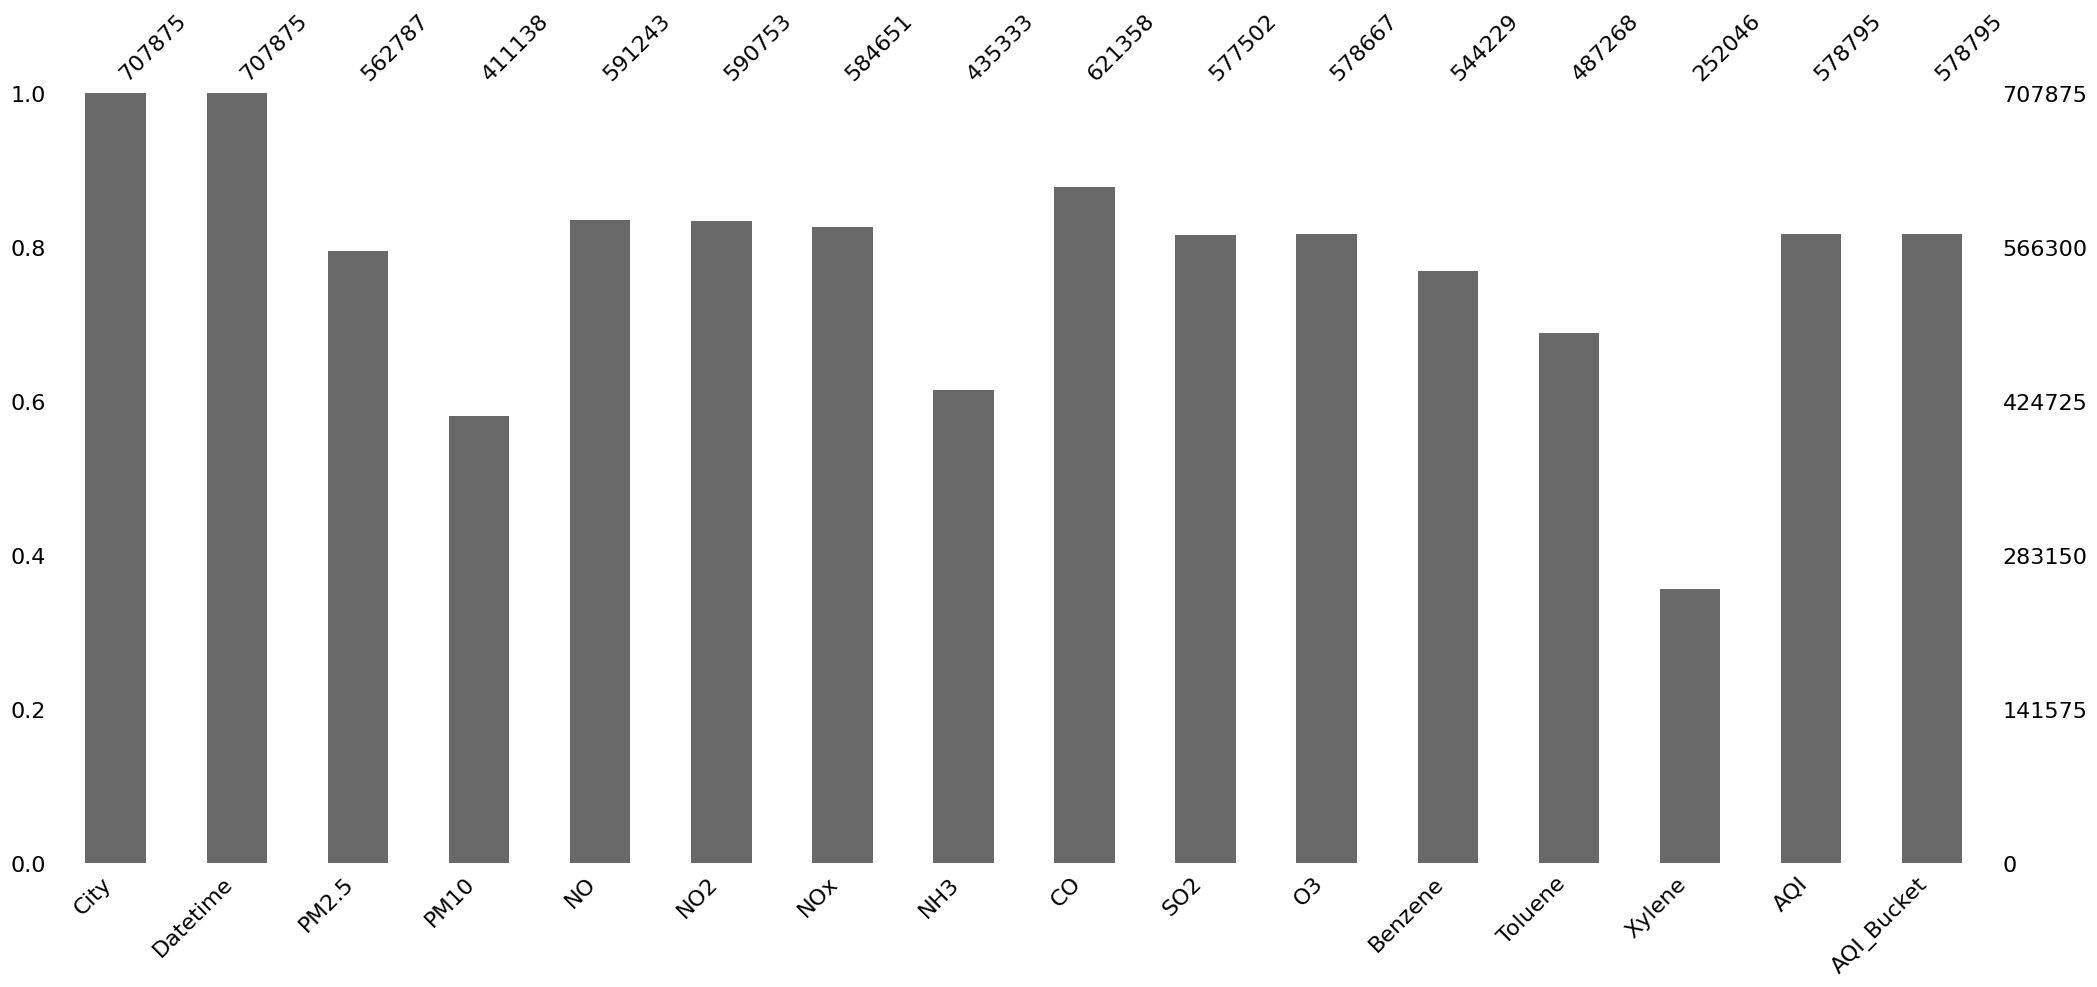

In [224]:
df.isnull().sum()
msno.bar(df)


## Choose out a city

In [225]:
# Calculation a city have the most least missing data 
cities = df['City'].unique()

missing_data_percentage = pd.DataFrame(index=cities)


for col in df.columns:
    if col not in ['City', 'Datetime']:
        percent_missing = []
        for city in cities:
            city_data = df[df['City'] == city]
            percent = (city_data[col].isnull().sum() / len(city_data)) * 100
            percent_missing.append(percent)
        missing_data_percentage[col] = percent_missing

missing_data_percentage['Average_Missing'] = missing_data_percentage.mean(axis=1)
print(missing_data_percentage['Average_Missing'])

Ahmedabad             41.968436
Aizawl                18.017058
Amaravati             19.310857
Amritsar              17.395050
Bengaluru             16.011549
Bhopal                25.157799
Brajrajnagar          39.042829
Chandigarh             5.707008
Chennai               20.676372
Coimbatore            19.571073
Delhi                  4.418339
Ernakulam             19.186693
Gurugram              34.155944
Guwahati              16.091366
Hyderabad              7.069063
Jaipur                10.355739
Jorapokhar            58.618071
Kochi                 19.638224
Kolkata                7.562939
Lucknow               24.366077
Mumbai                52.211689
Patna                 31.372684
Shillong              29.280696
Talcher               39.342603
Thiruvananthapuram    27.561550
Visakhapatnam         18.807642
Name: Average_Missing, dtype: float64


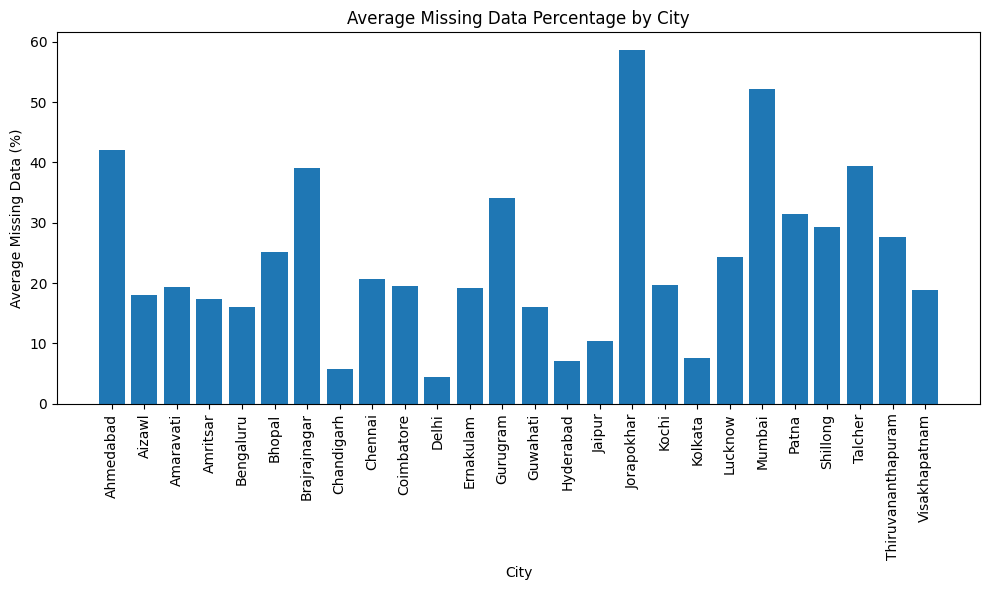

In [226]:
plt.figure(figsize=(10, 6))
plt.bar(cities, missing_data_percentage['Average_Missing'])
plt.xlabel('City')
plt.ylabel('Average Missing Data (%)')
plt.title('Average Missing Data Percentage by City')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [227]:
# Observe Delhi is a city have the most least missing percentage.
# CHOOSE DELHI
df_Delhi = df[df['City'] == 'Delhi']

In [228]:
df_Delhi.isnull().sum()

City              0
Datetime          0
PM2.5           375
PM10           2421
NO              298
NO2             330
NOx              25
NH3             980
CO              364
SO2            2852
O3             2201
Benzene          38
Toluene          26
Xylene        18904
AQI             498
AQI_Bucket      498
dtype: int64

In [229]:
# Drop label, we will label it later
df_Delhi = df_Delhi.drop(['City','AQI_Bucket'], axis=1)

In [230]:
df_Delhi.head(5)

,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
245172,2015-01-01 01:00:00,454.58,935.18,81.52,41.78,187.66,27.54,9.29,3.41,54.94,25.24,58.57,13.80,NaN
245173,2015-01-01 02:00:00,440.44,NaN,70.80,43.46,176.83,27.72,13.28,3.88,50.53,23.10,49.37,15.63,NaN
245174,2015-01-01 03:00:00,409.09,NaN,132.46,41.19,141.02,28.94,29.67,2.83,19.33,19.04,38.94,17.18,NaN
245175,2015-01-01 04:00:00,436.12,NaN,84.78,39.55,102.84,29.30,21.76,4.33,20.08,13.99,27.53,16.82,NaN
245176,2015-01-01 05:00:00,415.88,976.99,60.24,37.41,80.12,30.84,26.19,6.17,16.00,11.14,21.99,14.29,NaN


## Handle missing data
> Replace all NaN values by using Imputations technical for time series data
* Foward fill: replace NaN values by before observed value
* Back fill: replace NaN values by next observed value
* Linear Interpolation: 

<Axes: >

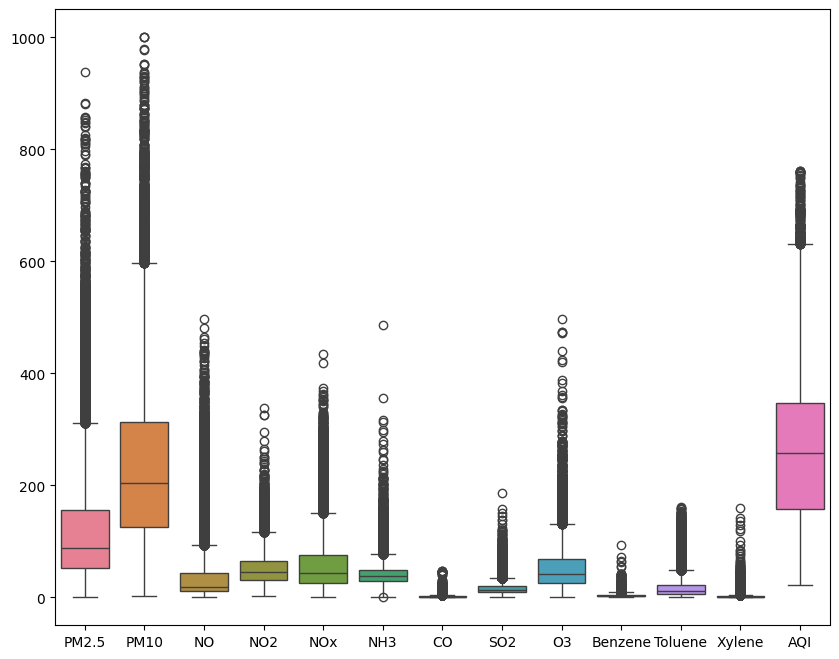

In [231]:
# Observe outline
plt.figure(figsize=(10, 8))  
sbn.boxplot(df_Delhi)

<Axes: >

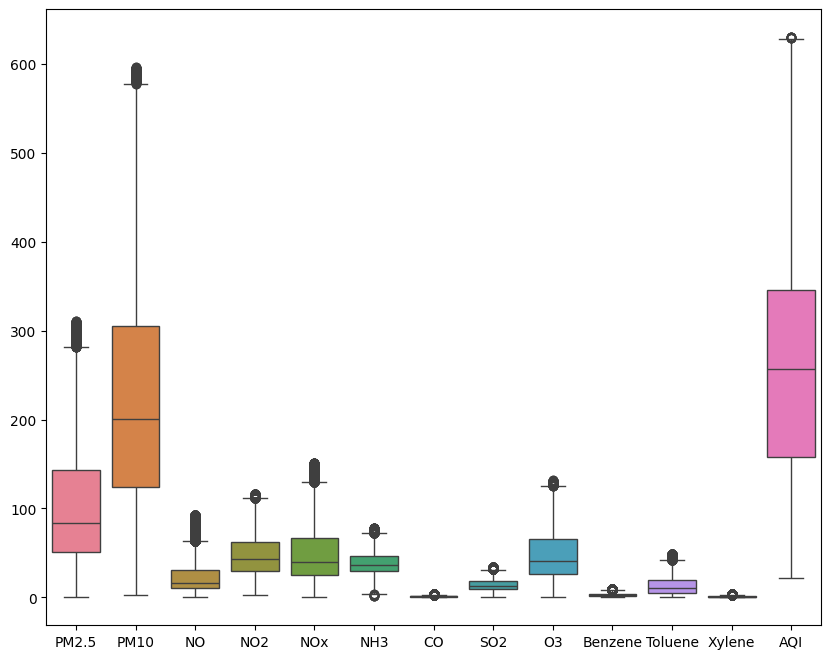

In [232]:
def convert_outlier(column):
    column_copy = column.copy()
    q1 = column_copy.quantile(0.25)
    q3 = column_copy.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    column_copy[column_copy < lower_bound] = np.nan
    column_copy[column_copy > upper_bound] = np.nan
    return column_copy
    
for column in df_Delhi.columns:
    if column != 'Datetime':
        df_Delhi[column] = convert_outlier(df_Delhi[column])

# Observe outline
plt.figure(figsize=(10, 8))  
sbn.boxplot(df_Delhi)

In [233]:
# Linear Interpolation
for col in df_Delhi.columns:
    if(col != 'Datetime'):
        df_Delhi[col] = df_Delhi[col].interpolate(method='linear')
        df_Delhi[col] = df_Delhi[col].bfill()

In [234]:
df_Delhi.isnull().sum()

Datetime    0
PM2.5       0
PM10        0
NO          0
NO2         0
NOx         0
NH3         0
CO          0
SO2         0
O3          0
Benzene     0
Toluene     0
Xylene      0
AQI         0
dtype: int64

## Calculate Air Quality
### Formula
![](https://i.imgur.com/vQR5Zy0.png)

* The AQI calculation uses 7 measures: **PM2.5, PM10, SO2, NOx, NH3, CO and O3**.
* For **PM2.5, PM10, SO2, NOx and NH3** the average value in last 24-hrs is used with the condition of having at least 16 values.
* For **CO and O3** the maximum value in last 8-hrs is used.
* Each measure is converted into a Sub-Index based on pre-defined groups.
* Sometimes measures are not available due to lack of measuring or lack of required data points.
* Final AQI is the maximum Sub-Index with the condition that at least one of PM2.5 and PM10 should be available and at least three out of the seven should be available.

In [235]:
df_Delhi["PM10_24hr_avg"] = df_Delhi["PM10"].rolling(window = 24, min_periods = 16).mean().values
df_Delhi["PM2.5_24hr_avg"] = df_Delhi["PM2.5"].rolling(window = 24, min_periods = 16).mean().values
df_Delhi["SO2_24hr_avg"] = df_Delhi["SO2"].rolling(window = 24, min_periods = 16).mean().values
df_Delhi["NOx_24hr_avg"] = df_Delhi["NOx"].rolling(window = 24, min_periods = 16).mean().values
df_Delhi["NH3_24hr_avg"] = df_Delhi["NH3"].rolling(window = 24, min_periods = 16).mean().values
df_Delhi["CO_8hr_max"] = df_Delhi["CO"].rolling(window = 8, min_periods = 1).max().values
df_Delhi["O3_8hr_max"] = df_Delhi["O3"].rolling(window = 8, min_periods = 1).max().values

### PM2.5 (Particulate Matter 2.5-micrometer)
PM2.5 is measured in ug / m3 (micrograms per cubic meter of air). The predefined groups are defined in the function below:

In [236]:
## PM2.5 Sub-Index calculation
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0


df_Delhi["PM2.5_SubIndex"] = df_Delhi["PM2.5_24hr_avg"].apply(lambda x: get_PM25_subindex(x))


### PM10 (Particulate Matter 10-micrometer)
PM10 is measured in ug / m3 (micrograms per cubic meter of air). The predefined groups are defined in the function below:

In [237]:
## PM10 Sub-Index calculation
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0


df_Delhi["PM10_SubIndex"] = df_Delhi["PM10_24hr_avg"].apply(lambda x: get_PM10_subindex(x))


### SO2 (Sulphur Dioxide)
SO2 is measured in ug / m3 (micrograms per cubic meter of air). The predefined groups are defined in the function below:

In [238]:
## SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0


df_Delhi["SO2_SubIndex"] = df_Delhi["SO2_24hr_avg"].apply(lambda x: get_SO2_subindex(x))

### NOx (Any Nitric x-oxide)
NOx is measured in ppb (parts per billion). The predefined groups are defined in the function below:


In [239]:
## NOx Sub-Index calculation
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0


df_Delhi["NOx_SubIndex"] = df_Delhi["NOx_24hr_avg"].apply(lambda x: get_NOx_subindex(x))


### NH3 (Ammonia)
NH3 is measured in ug / m3 (micrograms per cubic meter of air). The predefined groups are defined in the function below:

In [240]:
## NH3 Sub-Index calculation
def get_NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0


df_Delhi["NH3_SubIndex"] = df_Delhi["NH3_24hr_avg"].apply(lambda x: get_NH3_subindex(x))


### CO (Carbon Monoxide)
CO is measured in mg / m3 (milligrams per cubic meter of air). The predefined groups are defined in the function below:

In [241]:
## CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

df_Delhi["CO_SubIndex"] = df_Delhi["CO_8hr_max"].apply(lambda x: get_CO_subindex(x))


### O3 (Ozone or Trioxygen)
O3 is measured in ug / m3 (micrograms per cubic meter of air). The predefined groups are defined in the function below:

In [242]:
## O3 Sub-Index calculation
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0


df_Delhi["O3_SubIndex"] = df_Delhi["O3_8hr_max"].apply(lambda x: get_O3_subindex(x))


### AQI
#### How is AQI calculated?
1. The Sub-indices for individual pollutants at a monitoring location are calculated using its
24-hourly average concentration value (8-hourly in case of CO and O3) and health
breakpoint concentration range. The worst sub-index is the AQI for that location.
2. All the eight pollutants may not be monitored at all the locations. Overall AQI is
calculated only if data are available for minimum three pollutants out of which one should
necessarily be either PM2.5 or PM10. Else, data are considered insufficient for calculating
AQI. Similarly, a minimum of 16 hours’ data is considered necessary for calculating subindex.
3. The sub-indices for monitored pollutants are calculated and disseminated, even if data are
inadequate for determining AQI. The Individual pollutant-wise sub-index will provide air
quality status for that pollutant.
4. The web-based system is designed to provide AQI on real time basis. It is an automated
system that captures data from continuous monitoring stations without human
intervention, and displays AQI based on running average values (e.g. AQI at 6am on a
day will incorporate data from 6am on previous day to the current day).
5. For manual monitoring stations, an AQI calculator is developed wherein data can be fed
manually to get AQI value. f AQI.

The final AQI is the maximum Sub-Index among the available sub-indices with the condition that at least one of PM2.5 and PM10 should be available and at least three out of the seven should be available.

There is no theoretical upper value of AQI but its rare to find values over 1000.

The pre-defined buckets of AQI are as follows:
![](https://i.imgur.com/XmnE0rT.png)


In [243]:
## AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN

df_Delhi["Checks"] = (
    (df_Delhi["PM2.5_SubIndex"] > 0).astype(int)
    + (df_Delhi["PM10_SubIndex"] > 0).astype(int)
    + (df_Delhi["SO2_SubIndex"] > 0).astype(int)
    + (df_Delhi["NOx_SubIndex"] > 0).astype(int)
    + (df_Delhi["NH3_SubIndex"] > 0).astype(int)
    + (df_Delhi["CO_SubIndex"] > 0).astype(int)
    + (df_Delhi["O3_SubIndex"] > 0).astype(int)
)

df_Delhi["AQI_calculated"] = round(
    df_Delhi[
        [
            "PM2.5_SubIndex",
            "PM10_SubIndex",
            "SO2_SubIndex",
            "NOx_SubIndex",
            "NH3_SubIndex",
            "CO_SubIndex",
            "O3_SubIndex",
        ]
    ].max(axis=1)
)
df_Delhi.loc[df_Delhi["PM2.5_SubIndex"] + df_Delhi["PM10_SubIndex"] <= 0, "AQI_calculated"] = np.NaN
df_Delhi.loc[df_Delhi.Checks < 3, "AQI_calculated"] = np.NaN

df_Delhi["AQI_bucket_calculated"] = df_Delhi["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))
df_Delhi.tail(5)


,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,...,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated
293359,2020-06-30 20:00:00,43.19,123.26,6.33,22.28,17.66,29.92,0.92,10.64,44.13,...,61.437500,84.418750,13.165625,20.086458,7.034896,46.0,62.55,7,84.0,Satisfactory
293360,2020-06-30 21:00:00,45.30,125.22,6.34,22.91,17.96,29.95,1.04,10.59,39.62,...,63.140972,87.082500,13.124479,19.675000,7.069167,52.0,62.55,7,87.0,Satisfactory
293361,2020-06-30 22:00:00,49.04,129.39,6.29,20.95,16.80,30.01,1.00,10.20,38.95,...,64.852778,89.670000,13.096875,19.410938,7.093542,52.0,62.55,7,90.0,Satisfactory
293362,2020-06-30 23:00:00,50.51,128.86,6.19,20.40,16.83,29.40,0.94,10.98,34.53,...,66.333333,91.976250,13.135938,19.295313,7.119792,52.0,62.55,7,92.0,Satisfactory
293363,2020-07-01 00:00:00,54.01,128.66,6.33,21.05,16.81,29.06,0.97,11.15,29.73,...,68.326389,94.569167,13.175521,19.227083,7.155208,52.0,60.22,7,95.0,Satisfactory


In [244]:
df_Delhi.columns

Index(['Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'PM10_24hr_avg',
       'PM2.5_24hr_avg', 'SO2_24hr_avg', 'NOx_24hr_avg', 'NH3_24hr_avg',
       'CO_8hr_max', 'O3_8hr_max', 'PM2.5_SubIndex', 'PM10_SubIndex',
       'SO2_SubIndex', 'NOx_SubIndex', 'NH3_SubIndex', 'CO_SubIndex',
       'O3_SubIndex', 'Checks', 'AQI_calculated', 'AQI_bucket_calculated'],
      dtype='object')

In [245]:
df_Delhi.isnull().sum()

Datetime                  0
PM2.5                     0
PM10                      0
NO                        0
NO2                       0
NOx                       0
NH3                       0
CO                        0
SO2                       0
O3                        0
Benzene                   0
Toluene                   0
Xylene                    0
AQI                       0
PM10_24hr_avg            15
PM2.5_24hr_avg           15
SO2_24hr_avg             15
NOx_24hr_avg             15
NH3_24hr_avg             15
CO_8hr_max                0
O3_8hr_max                0
PM2.5_SubIndex            0
PM10_SubIndex             0
SO2_SubIndex              0
NOx_SubIndex              0
NH3_SubIndex              0
CO_SubIndex               0
O3_SubIndex               0
Checks                    0
AQI_calculated           15
AQI_bucket_calculated    15
dtype: int64

In [246]:
df_Delhi = df_Delhi.drop(['Datetime','AQI', 'Checks', 'AQI_calculated'], axis=1)

In [247]:
df_Delhi.shape

(48192, 27)

In [249]:
df_Delhi = df_Delhi.iloc[16:,:]

In [251]:
df_Delhi.to_csv('caculated_aqi.csv', index=False)